<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/OB/ESAA_OB_week03_2_unsupervised_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **비지도 학습**

## **2) 가우시안 혼합**

**가우시안 혼합 모델(GMM)**은 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델이다. 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성하며 일반적으로 이 클러스터는 타원형이다. 하지만 어떤 분포인지 또 이 부노의 파라미터는 무엇인지 알지 못한다.

여러 GMM 변종이 있다. 가장 간단한 버전이 GaussianMixture 클래스에 구현되어 있다. 여기에서는 사전에 가우시안 분포의 개수 $k$를 알아야 한다.

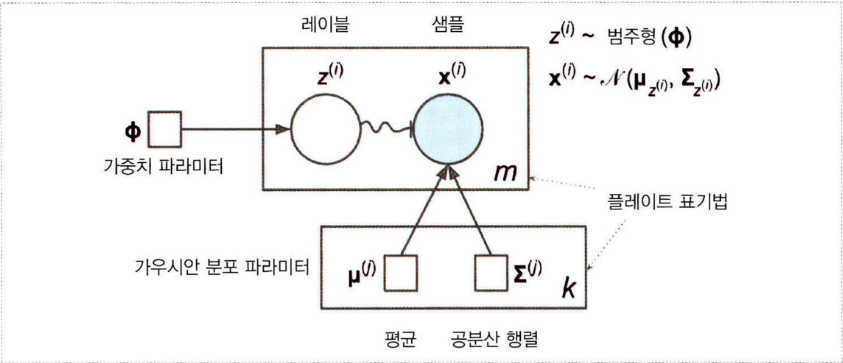

사이킷런의 GaussianMixture 클래스를 사용할 수 있다.

In [3]:
import numpy as np

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000,noise=0.05)

In [4]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [6]:
print(gm.weights_)
print(gm.means_)
print(gm.covariances_)

[0.19661395 0.60379867 0.19958738]
[[-0.76067202  0.54734807]
 [ 0.49439855  0.25113682]
 [ 1.75055735 -0.05182382]]
[[[ 0.0459997   0.05706019]
  [ 0.05706019  0.08699963]]

 [[ 0.17798275 -0.11318285]
  [-0.11318285  0.29394722]]

 [[ 0.04688984  0.05737161]
  [ 0.05737161  0.08482244]]]


실제 이 데이터를 생성하기위해 사용한 가중치는 0.2, 0.4, 0.4이다. 이 클래스는 **기댓값-최대화**(EM) 알고리즘을 사용한다. 이 알고리즘은 k-평균 알고리즘과 공통점이 많다. 클러스터 파라미터를 랜덤하게 초기화하고 수렴할 때까지 두 단계를 반복한다. 이 두 단계를 **기댓값 단계**와 **최대화 단계**라고 부른다. k-평균과 달리 EM은 하드 클러스터 할당이 아니라 소프트 클러스터 할당을 사용한다. 기댓값 단계에서 알고리즘은 각 클러스터에 속할 확률을 예측한다. 그 다음 최대화 단계에서 각 클러스터가 데이터셋에 있는 모든 샘플을 사용해 업데이트 된다. 클러스터에 속할 추정 확률로 샘플에 가중치가 적용된다. 이 확률을 샘플에 대한 클러스터의 **책임**이라고 한다. 최대화 단계에서 클러스터 업데이트는 책임이 가장 많은 샘플에 크게 영향을 받는다.

In [7]:
print(gm.converged_)
print(gm.n_iter_)

True
16


In [8]:
print(gm.predict(X))
print(gm.predict_proba(Xㄱ))

[2 0 1 1 2 1 2 1 0 1 0 1 1 1 0 0 0 1 2 1 0 1 1 2 2 1 1 1 1 1 1 1 2 2 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 0 1 0 1 1 1 1 0 2 1 1 2 1 1 1 1 1 1 1 1
 2 1 0 1 1 1 1 2 2 0 2 1 1 1 2 1 1 0 0 2 1 1 2 1 2 1 1 2 0 2 1 2 2 1 0 1 1
 2 2 1 1 0 1 0 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 0 1 1 1 2 1 2 1 1 2 2 1 0 1 0
 1 0 2 0 2 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 2 1 1 1 2 1 2 1 1 1
 2 0 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 2 2 1 2 0 2 0 0 1 0 0 0 2 1 2 2 1
 1 1 2 2 2 1 2 2 2 2 1 1 2 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 2 1 2 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 2 2 1 1 0 0 1 1 1 1 0 1 0 2 0 1 1 1 1 0 1 1 2
 0 1 1 1 0 1 1 0 1 2 1 1 1 2 0 1 2 1 1 1 1 2 1 1 2 2 1 1 0 2 1 1 1 0 1 1 2
 1 1 1 2 1 0 0 1 1 1 1 1 2 2 0 1 1 1 0 1 0 1 1 2 1 1 1 1 2 2 2 2 2 1 1 1 1
 0 0 2 1 1 0 2 1 1 1 2 1 2 1 0 1 1 1 1 1 2 1 1 2 1 2 1 1 2 2 0 1 0 1 1 1 1
 1 2 0 1 0 1 0 0 2 2 0 1 2 2 0 1 0 1 2 1 2 2 1 1 1 1 1 1 1 1 0 0 1 1 2 1 0
 1 0 2 2 2 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 2 1 1 1 2 1 1 0 1 1 1 1 2
 2 1 2 1 1 1 1 0 2 1 1 2 

가우시안 혼합 모델은 **생성 모델**이다. 즉 이 모델에서 새로운 샘플을 만들 수 있다.

In [9]:
X_new, y_new = gm.sample(6)
print(X_new)
print(y_new)

[[ 1.17733812 -1.24021809]
 [ 1.41828474  0.480143  ]
 [ 0.69425784  0.26004737]
 [ 0.79493781 -0.25133   ]
 [ 0.29389089  0.1222199 ]
 [ 1.7232234  -0.12690264]]
[1 1 1 1 1 2]


또한 주어친 위치에서 모델의 밀도를 추정할 수 있다. 이를 위해 score_samples( ) 메서드를 사용한다. 샘플이 주어지면 이 메서드는 그 위치의 **확률 밀도 함수**의 로그를 예측한다.

In [10]:
gm.score_samples(X)

array([-1.20155543e-01, -5.82487236e-01, -1.60727307e+00, -2.11065930e+00,
       -8.17924546e-01, -2.04099990e+00, -6.00921432e-01, -1.63395929e+00,
       -2.43599876e-01, -1.41590085e+00, -1.33872414e+00, -1.51124853e+00,
       -1.67651511e+00, -1.91491120e+00, -4.00829180e-02, -1.71844372e+00,
       -2.13090569e+00, -1.60593663e+00, -1.45961838e-01, -2.29066052e+00,
       -7.06775940e-01, -1.30335300e+00, -1.21191006e+00, -5.50508584e-01,
        4.79724963e-02, -1.63411901e+00, -1.55581803e+00, -1.59154056e+00,
       -1.22598394e+00, -1.47016581e+00, -1.79187035e+00, -1.32717648e+00,
        8.25162674e-02, -7.56803849e-01, -1.66527666e+00, -1.86219378e+00,
       -1.56058128e+00, -2.23652617e+00, -1.68515618e+00, -1.68067068e+00,
       -1.68324183e+00,  1.65994697e-01, -1.47030388e+00, -1.67913764e+00,
       -1.94813370e+00, -1.50317850e+00, -1.63663424e+00, -2.23525607e+00,
       -7.95225722e-01, -1.58899118e+00, -8.71366427e-01, -1.60523109e+00,
       -1.71544277e+00, -

이 점수의 지숫값을 계산하면 샘플의 위치에서 PDF 값을 얻을 수 있다. 샘플이 특정 지역 안에 속할 확률을 예측하려면 그 지역에 대해 PDF를 적분해야 한다.

특성이나 클러스터가 많거나 샘플이 적을 때는 EM이 최적의 솔루션으로 수렴하기 어렵다. 이런 어려움을 줄이기 위해서는 알고리즘이 학습할 파라미터 개수를 제한해야 한다. 이런 방법 중 하나는 클러스터의 모양과 방향의 범위를 제한하는 것이다. 사이킷런에서는 **covariance_type** 매개변수에 다음 값 중 하나를 설정하면 된다.

- **spherical**: 모든 클러스터가 원형
- **diag**: 클러스터는 크기에 상관없이 타원형도 가능
- **tied**: 클러스터가 동일한 타원 모양, 크기, 방향을 가짐

covariance_type 매개변수의 default는 "full"이다. 각 클러스터는 모양, 크기, 방향에 제약이 없다.

### **2.1) 가우시안 혼합을 사용한 이상치 탐지**
가우시안 혼합 모델을 이상치 탐지에 사용하는 방법은 매우 간단하다. 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 볼 수 있다. 이렇게 하려면 사용할 밀도 임곗값을 정해야 한다.

만약 거짓 양성이 너무 많다면 임곗값을 더 낮추고, 거짓 음성이 너무 많다면 임곗값을 높여야 한다. 이는 일반적인 정밀도/재현율 트레이드 오프이다.

In [11]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities<density_threshold]

이와 비슷한 작업은 **특이치 탐지**이다. 이 알고리즘은 이상치로 오염되지 않은 데이터셋에서 훈련하기에 이상치 탐지와 다르다.

### **2.2) 클러스터 개수 선택하기**
k-평균에서는 이너셔나 실루엣 점수를 사용해 적절한 클러스터 개수를 선택한다. 가우시안 혼합에서는 이런 지표를 사용할 수 없다. 이런 지표들은 클러스터가 타원형이거나 크기가 다를 때 안정적이지 않기 때문이다. 대신 정의된 **BIC**이나 **AIC**와 같은 **이론적 정보 기준**을 최소화 하는 모델을 찾는다.

BIC나 AIC는 모두 학습할 파라미터가 많은 모델에게 벌칙을 가하고 데이터에 잘 학습하는 모델에게 보상을 더한다. 이 둘은 종종 동일한 모델을 선택한다. 둘의 선택이 다를 경우 BIC가 선택한 모델이 AIC가 선택한 모델보다 간단한 경향이 있다.

bic( )와 aic( ) 메서드를 사용해 BIC와 AIC를 계산한다.

In [12]:
print(gm.bic(X), gm.aic(X))

2744.3290238147924 2660.897184072096


### **2.3) 베이즈 가우시안 혼합 모델**
최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드는 BayesianGaussianMixture 클래스를 사용할 수 있다. 클러스터 개수 n_components를 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지정한다. 이 알고리즘은 자동으로 불필요한 클러스터를 제거한다.

In [13]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_,2)

/usr/local/lib/python3.12/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.13, 0.12, 0.1 , 0.13, 0.14, 0.12, 0.12, 0.14, 0.  , 0.  ])

알고리즘이 자동으로 8개의 클러스터가 필요하다는 것을 감지했다.

이 모델에서 클러스터 파라미터는 더는 고정된 모델 파라미터가 아니라 클러스터 할당처럼 잠재 확률 변수로 취급된다.

**베타 분포**는 고정 범위 안에 놓인 값을 가진 확률 변수를 모델링할 때 자주 사용된다. 이 경우는 0에서 1 범위이다.
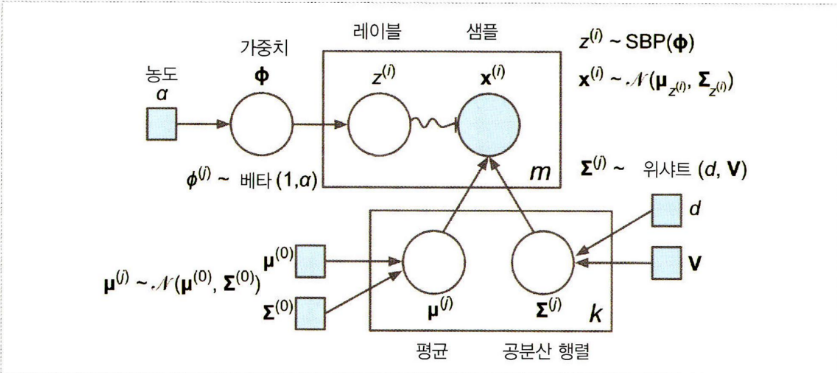

### **2.4) 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘**

- **PCA(inverse_transform( ) 메서드를 가진 차원 축소 기법)
- **Fast-MCD**
- **아이솔레이션 포레스트**
- **LOF**
- **one-class SVM**